You can download it from this address : https://www.kaggle.com/rajyellow46/wine-quality



**Why we choose this dataset?**

We chose wine as our dataset since we would like to create a model that predicts the type of wine from its other features. Though we may have eyes to recognize the color ourselves, there is no way a machine model can actually see the difference between white and red wine. A model has no senses. It can't taste the wine or see its color. The idea that we can use only data to predict the color of the wine is a big thing. This model may look somewhat meaningless, but it is the base for creating more significant and more efficient models in the future.


**Objectives :**
- To explore how the attributes of this dataset contribute to the quality of wine ( in this case, white and red wine )
- Generating models from Logistic Regression, Decision Tree, KNN and SVM to find out which one is the most useful in classifying type of wine based on features given in the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import warnings 

# DATA PREPROCESSING 

In [9]:
df=pd.read_csv(r"C:\Users\BAO NGOC\Downloads\archive (5)/winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Check the number of rows and columns
df.shape

(6497, 13)

In [10]:
warnings.filterwarnings("ignore")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
df.quality.value_counts().sort_values(ascending=False)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

We decide to change 'string' Variables into 'numerical' variables of Type Column: 
White=1,
Red=0

In [12]:
#Change values in column "type" into numerical values
df['type'] = df['type'].replace('red',0)
df['type'] = df['type'].replace('white',1)

#Insert new column named "target" with the data of column "type"
target = df['type']
df1 = df.insert(len(df.columns),'target',target)
df1

#Drop 'type' column in df1
df1 = df.drop(labels=['type'],axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [13]:
#Check and drop duplicated row
print(df1.duplicated().sum())
df1.drop_duplicates(inplace=True)
df1

1168


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


We have found and removed 1168 duplicated rows

In [14]:
#Check whether there is missing values as well as the data type of each column.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5319 non-null   float64
 1   volatile acidity      5321 non-null   float64
 2   citric acid           5326 non-null   float64
 3   residual sugar        5327 non-null   float64
 4   chlorides             5327 non-null   float64
 5   free sulfur dioxide   5329 non-null   float64
 6   total sulfur dioxide  5329 non-null   float64
 7   density               5329 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5325 non-null   float64
 10  alcohol               5329 non-null   float64
 11  quality               5329 non-null   int64  
 12  target                5329 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 582.9 KB


In [17]:
#check the total nulls in each column
df1.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
target                   0
dtype: int64

In [18]:
#fill null in each column by mean of that column
for i in ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'pH', 'sulphates']:
       df1[i].fillna(df1[i].mean(),inplace=True)
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

# EXPLORATION ( Include Data Visualization )

In [19]:
#the descriptive statistics for numerical features
df1.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
count,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0,5329.0
mean,7.2,0.3,0.3,5.1,0.1,30.1,114.2,1.0,3.2,0.5,10.5,5.8,0.7
std,1.3,0.2,0.1,4.5,0.0,17.8,56.8,0.0,0.2,0.1,1.2,0.9,0.4
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0,3.0,0.0
25%,6.4,0.2,0.2,1.8,0.0,16.0,75.0,1.0,3.1,0.4,9.5,5.0,0.0
50%,7.0,0.3,0.3,2.7,0.0,28.0,116.0,1.0,3.2,0.5,10.4,6.0,1.0
75%,7.7,0.4,0.4,7.5,0.1,41.0,154.0,1.0,3.3,0.6,11.4,6.0,1.0
max,15.9,1.6,1.7,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.9,9.0,1.0


In [20]:
df1.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,1.00,0.22,0.33,-0.10,0.29,-0.28,-0.33,0.48,-0.27,0.31,-0.10,-0.08,-0.49
volatile acidity,0.22,1.00,-0.38,-0.16,0.37,-0.35,-0.40,0.31,0.25,0.23,-0.07,-0.26,-0.64
citric acid,0.33,-0.38,1.00,0.15,0.06,0.13,0.20,0.09,-0.34,0.06,-0.01,0.10,0.18
residual sugar,-0.10,-0.16,0.15,1.00,-0.12,0.40,0.49,0.52,-0.23,-0.17,-0.31,-0.06,0.33
chlorides,0.29,0.37,0.06,-0.12,1.00,-0.19,-0.27,0.37,0.03,0.40,-0.27,-0.20,-0.50
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.19,1.00,0.72,0.01,-0.14,-0.20,-0.17,0.05,0.47
total sulfur dioxide,-0.33,-0.40,0.20,0.49,-0.27,0.72,1.00,0.01,-0.22,-0.27,-0.25,-0.05,0.69
density,0.48,0.31,0.09,0.52,0.37,0.01,0.01,1.00,0.03,0.28,-0.67,-0.33,-0.43
pH,-0.27,0.25,-0.34,-0.23,0.03,-0.14,-0.22,0.03,1.00,0.17,0.10,0.04,-0.31
sulphates,0.31,0.23,0.06,-0.17,0.40,-0.20,-0.27,0.28,0.17,1.00,-0.02,0.04,-0.49


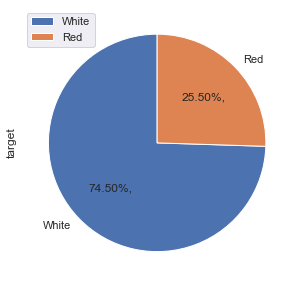

In [21]:
#Pie chart - checking whether the outcome data is balanced
# 0 stands for red, 1 stands for white

df1.target.value_counts().plot.pie(labels=['White','Red'],startangle = 90,autopct='%.2f%%,',figsize=(5,5))
plt.legend()

The pie chart shows that there is unbalanced classes in which out of 5329 wines ,there are much more white wines than red ones. In particular, white accounts for 74.5% while 

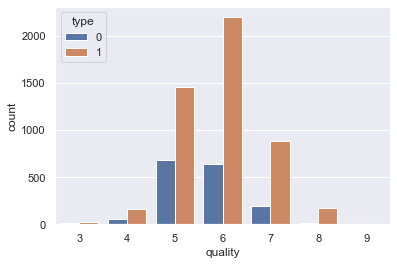

In [22]:
#Bar Chart
sns.set(style="darkgrid")
sns.countplot(df["quality"],hue="type",data=df)
plt.show()

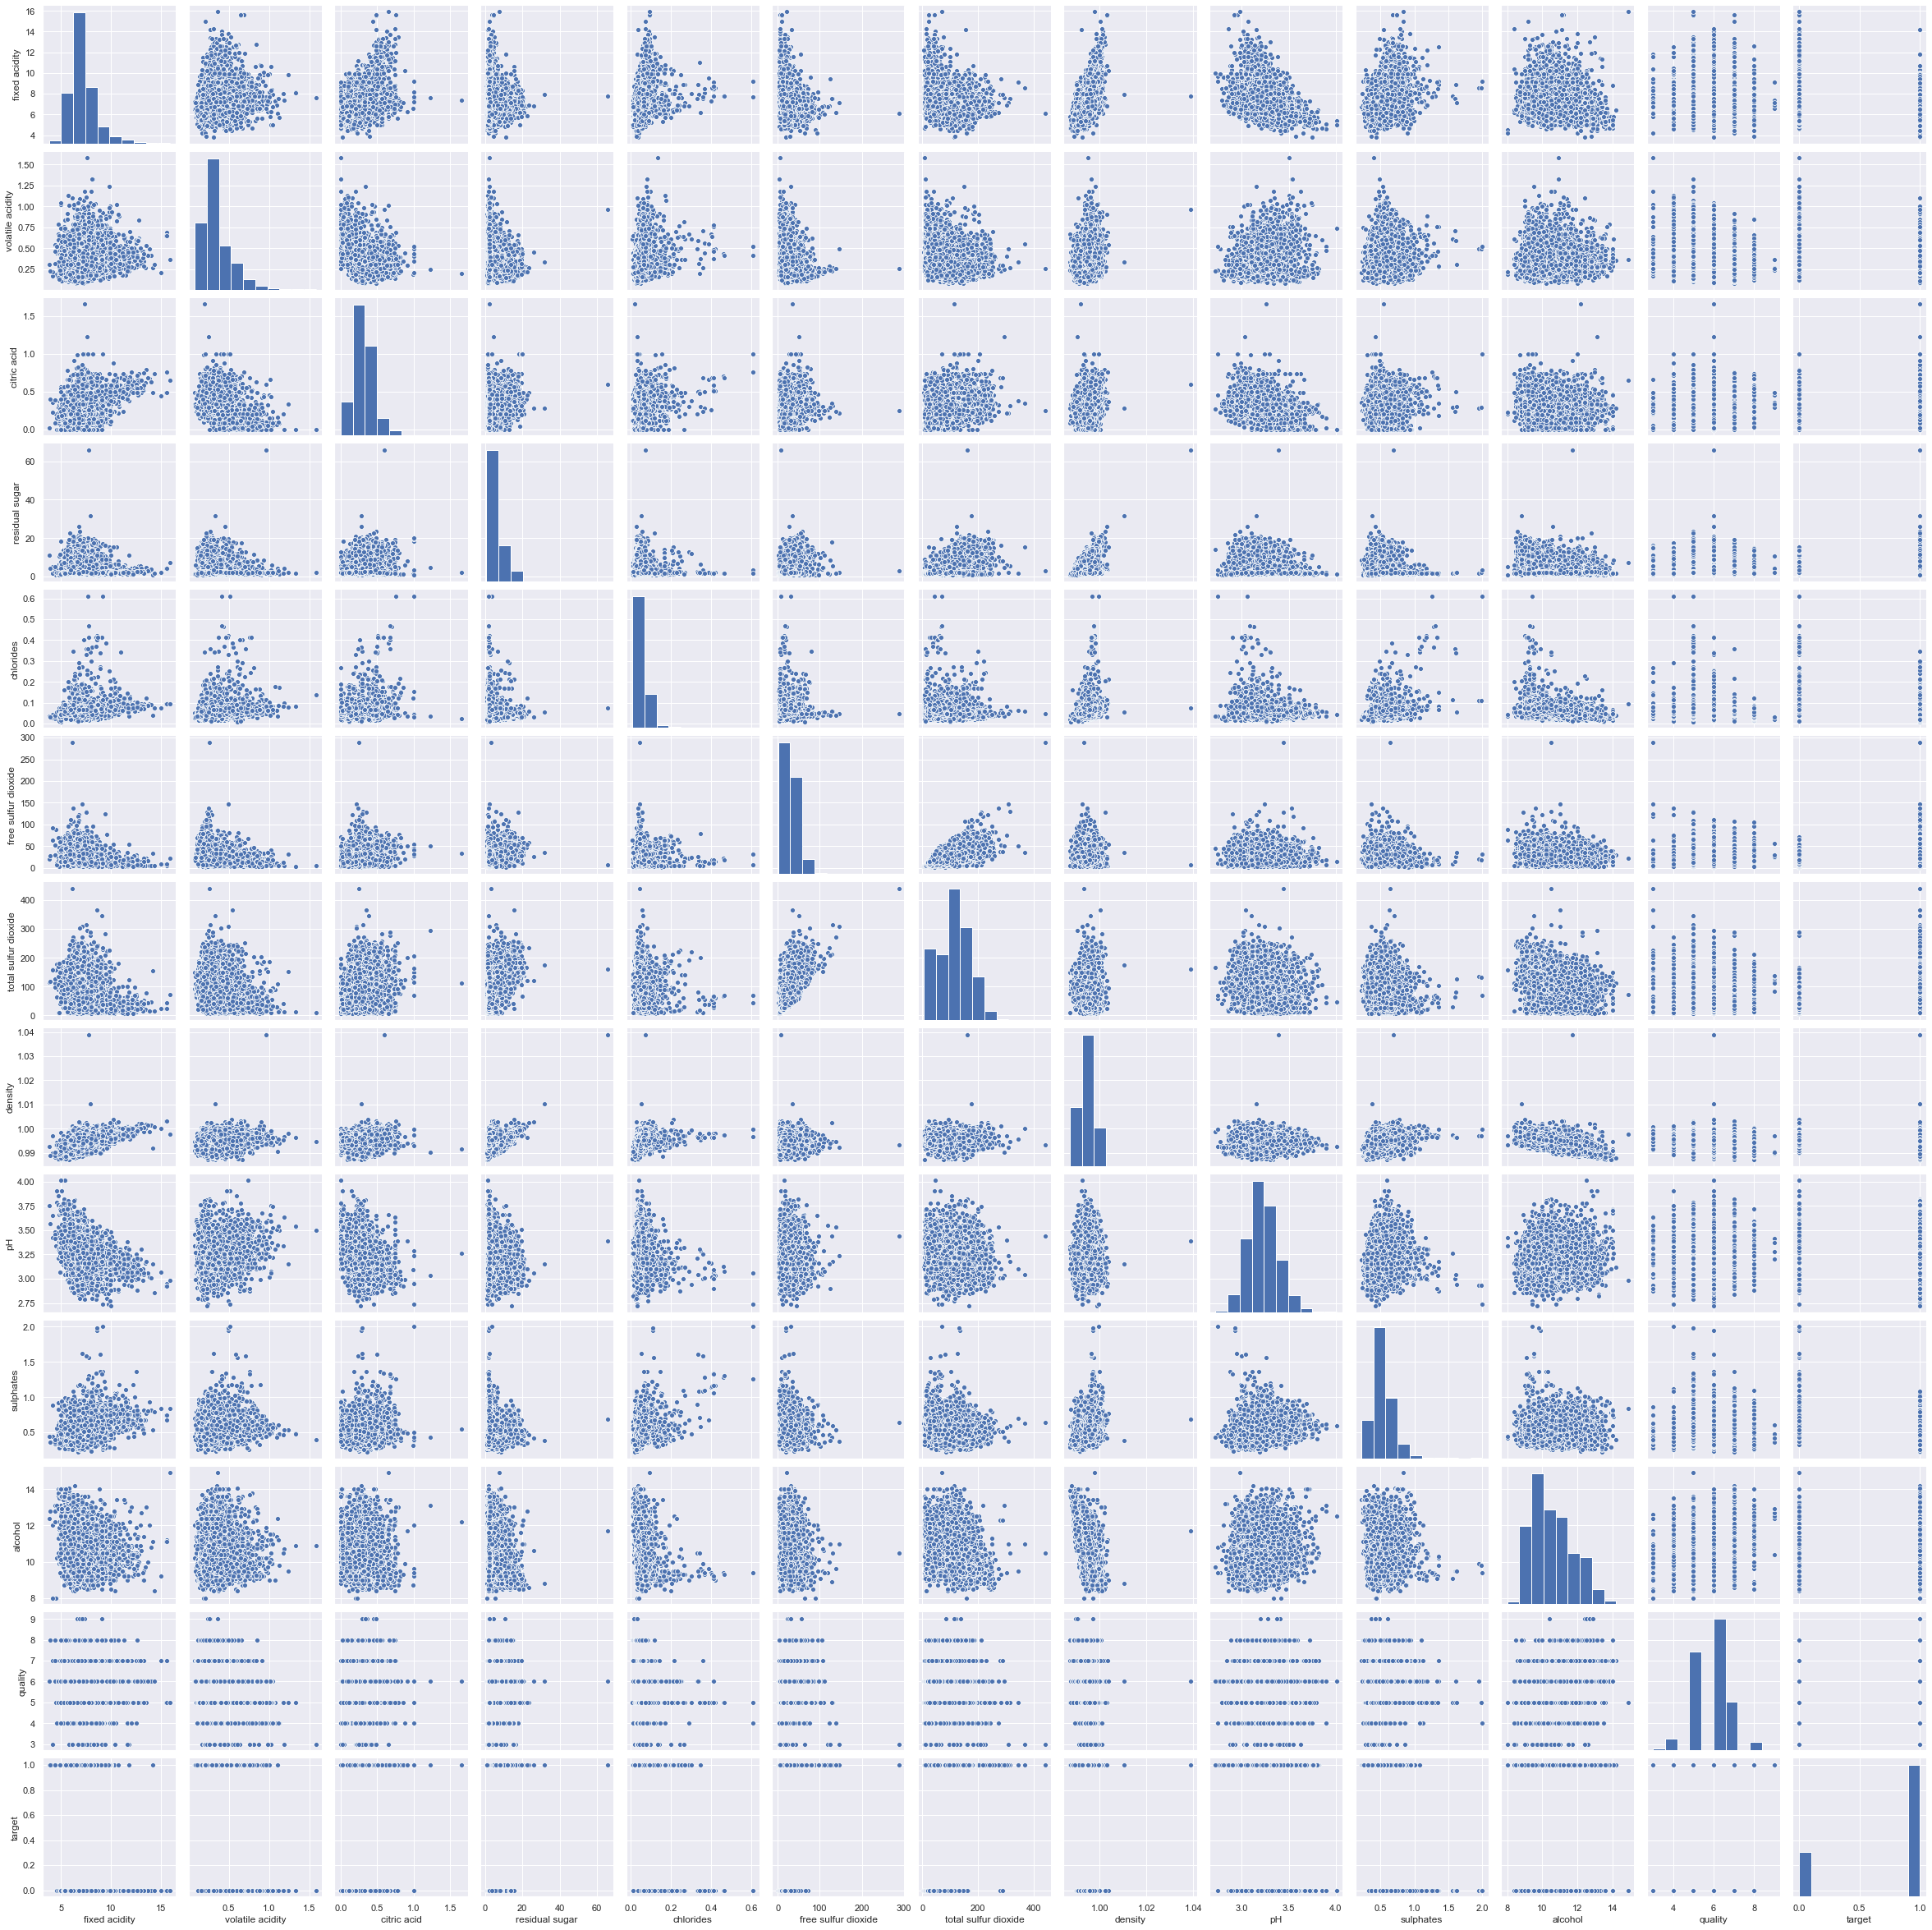

In [23]:
sns.set()
sns.pairplot(df1)
plt.show()

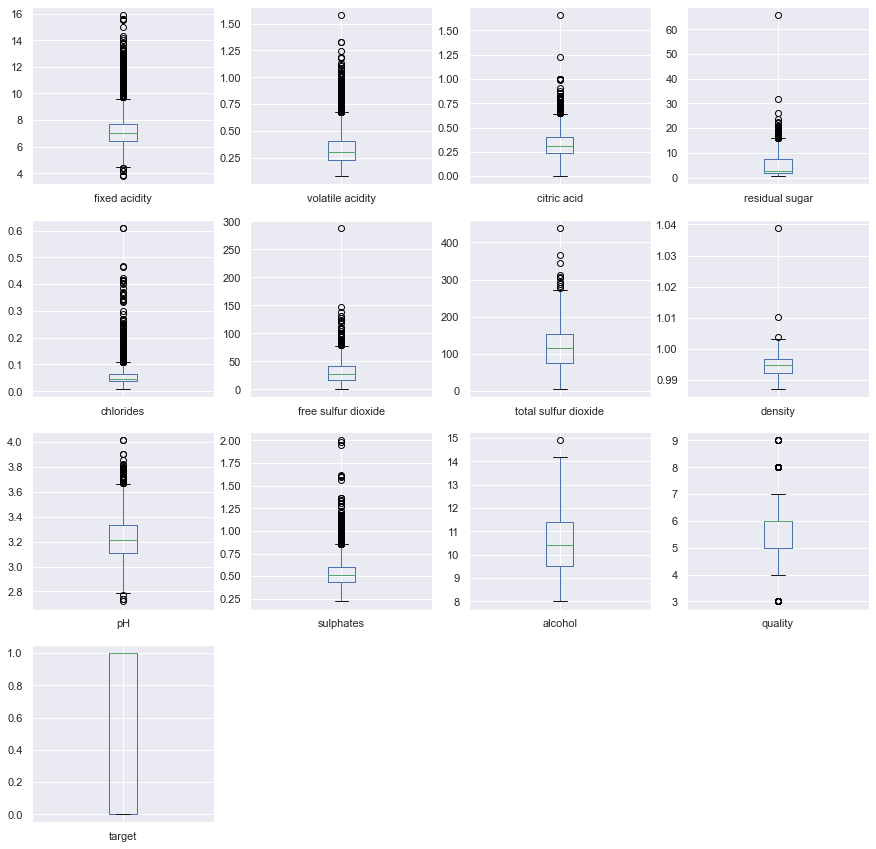

In [24]:
#BoxPlot
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize = (15,15))
plt.show()

We can observe that there exists a lot of outliers, which also means if we are trying to do any type of average, the data will be skewed.

 Let's remove them:

In [25]:
#Remove outliers (we decide to remove the data that is outside of 3 standard deviations)
for i in df1.columns :
    a = df1[i].mean() - 3*df1[i].std()
    b = df1[i].mean() + 3*df1[i].std()
    df2=df1[(df1[i] > a) & (df1[i] < b)]
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.533268,11.2,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


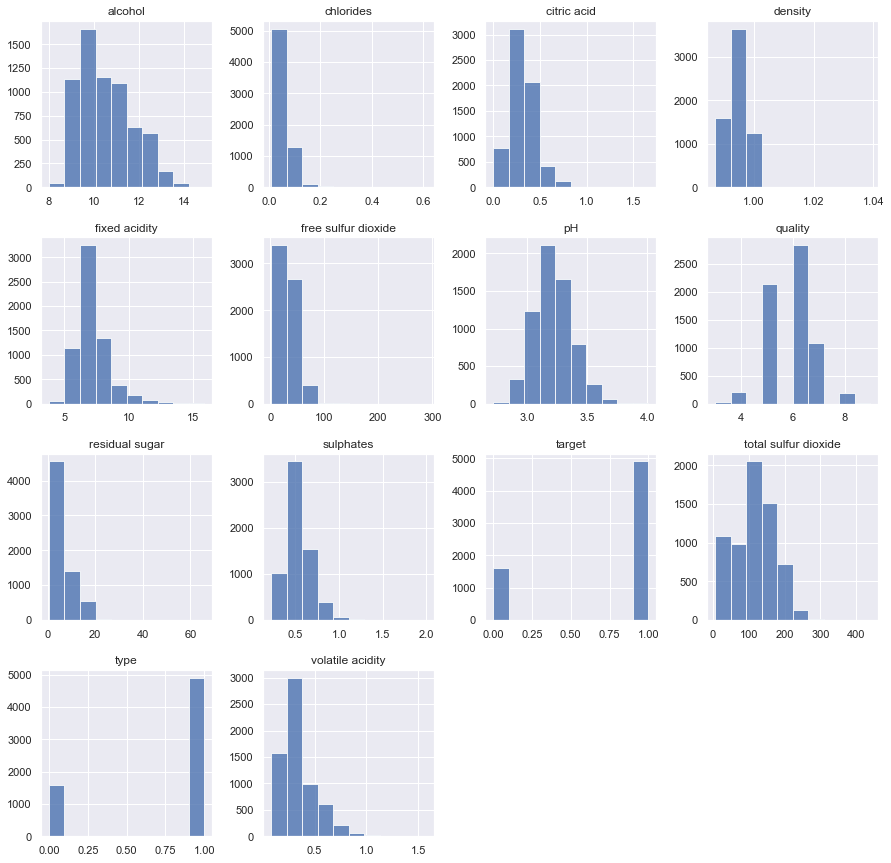

In [27]:
#Histogram
df.hist(alpha = 0.8, figsize=(15,15))
plt.show()

In [28]:
df1.groupby('target').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
target,,,,,,,,,,,,
0,8.311871,0.529245,0.272567,2.523400,0.088124,15.893304,46.825975,0.996709,3.309366,0.658437,10.432315,5.623252
1,6.841633,0.280753,0.334543,5.920052,0.045901,34.909698,137.248992,0.993792,3.195360,0.490420,10.588324,5.855164


In [59]:
#Interprete 1st objective

- On average, white wines have better quality than red ones.
- It seems that white wines also have a higher level of features; namely residual sugar, citric acid, free sulfur dioxide, total sulfur dioxide and alcohol
- For density, both wines just have slight difference between them
 

# MODELING

Select the best Features for the Model

In [29]:
x = df2.drop(['target'], axis = 'columns')
y = df2.target


In [30]:
# 70% of instances are used to train model and the remaining 30% is hold-out set.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 108, stratify = y)

I.Building and testing model

In [31]:
results=[]
names=[]
seed=7

In [32]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('SVM',SVC()))

In [33]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.977212(0.004833)
CARD:0.975603(0.007625)
KNN:0.936729(0.010870)
LDA:0.994638(0.004644)
SVM:0.932440(0.013920)


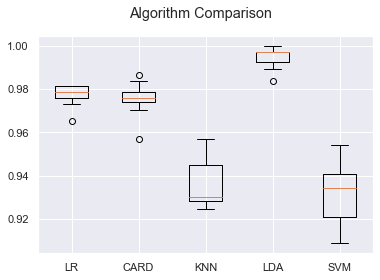

In [34]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear Discriminant, Logistic Regression and Decision tree Classifier are the model with the highest score with 99.5%, 98%, 97.5%

II.Roc Curve for comparison

1. Logistic Regression

In [35]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default
Logisticmodel.fit(x_train, y_train) #fit training data X and Y to obtain a Logistic regression model
print(Logisticmodel.score(x_test,y_test))

0.9693558474046279


In [36]:
print(Logisticmodel.classes_)
print(Logisticmodel.intercept_)
print(Logisticmodel.coef_)

[0 1]
[0.39434286]
[[-0.70838262 -5.39575184  1.47345231  0.15431633 -0.80089638 -0.06710282
   0.06836561  0.3551321  -2.34315491 -3.89430067  0.7982035   0.61385645]]


In [37]:
#Checking model's performance
#return matrix of probabilities in which 1st column refers to the probability of each holdout data being 0 
#whereas 2nd column is probability of being 1 
Logisticmodel.predict_proba(x_test) 

array([[2.68691644e-04, 9.99731308e-01],
       [1.84111937e-04, 9.99815888e-01],
       [9.99413169e-01, 5.86830783e-04],
       ...,
       [2.31168942e-02, 9.76883106e-01],
       [1.45814133e-02, 9.85418587e-01],
       [7.36983361e-04, 9.99263017e-01]])

In [38]:
#predicted target for holdout data
Logisticpredict = Logisticmodel.predict(x_test)
Logisticpredict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
#Ratio of number of correct prediction to the total number of test data
print(Logisticmodel.score(x_test,y_test))
print(Logisticmodel.score(x_train, y_train))

0.9693558474046279
0.9715817694369974


In [40]:
#Confusion matrix
Logisticmatrix = confusion_matrix(y_test, Logisticpredict)
Logisticmatrix

array([[ 377,   31],
       [  18, 1173]], dtype=int64)

In [41]:
#Classification report
Logisticreport = classification_report(y_test, Logisticpredict)
print(Logisticreport)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       408
           1       0.97      0.98      0.98      1191

    accuracy                           0.97      1599
   macro avg       0.96      0.95      0.96      1599
weighted avg       0.97      0.97      0.97      1599



In [42]:
#AUC of ROC curve 
LogisticAUC = roc_auc_score(y_test, Logisticmodel.predict_proba(x_test)[:,1])
LogisticAUC

0.9882842725671293

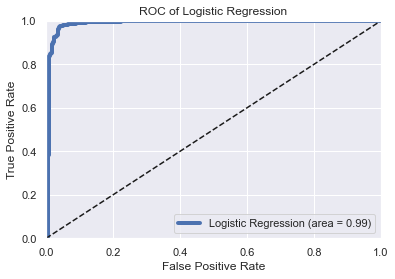

<Figure size 648x648 with 0 Axes>

In [43]:
#Plot ROC curve
FPr, TPr, threshold = roc_curve(y_test, Logisticmodel.predict_proba(x_test)[:,1])

plt.plot(FPr,TPr, linewidth = 4, label = 'Logistic Regression (area = %0.2f)' %LogisticAUC )
plt.plot([0,1], [0,1], 'k--') #draw the diagonal baseline
plt.title('ROC of Logistic Regression')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(9,9))
plt.show()

In [44]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
result_kfold_lr = cross_val_score(Logisticmodel, x, y, cv=kfold, scoring = "accuracy")
print(result_kfold_lr.mean(), '+/-', result_kfold_lr.std())

0.9705261041910592 +/- 0.02695999532003152


2. Decision Tree

In [45]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
#Checking model's performance
Tree_model.predict_proba(x_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [48]:
#predicted target using Classification Decision Tree
Tree_predict = Tree_model.predict(x_test)
Tree_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [49]:
print(Tree_model.score(x_train, y_train))
print(Tree_model.score(x_test, y_test))

0.9997319034852546
0.9793621013133208


In [50]:
#Confusion matrix
Tree_matrix = confusion_matrix(y_test, Tree_predict)
Tree_matrix

array([[ 390,   18],
       [  15, 1176]], dtype=int64)

In [51]:
#Classification report
Treereport = classification_report(y_test, Tree_predict)
print(Treereport)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       408
           1       0.98      0.99      0.99      1191

    accuracy                           0.98      1599
   macro avg       0.97      0.97      0.97      1599
weighted avg       0.98      0.98      0.98      1599



In [52]:
#AUC of ROC curve 
Tree_AUC = roc_auc_score(y_test, Tree_model.predict_proba(x_test)[:,1])
Tree_AUC

0.9716439472514447

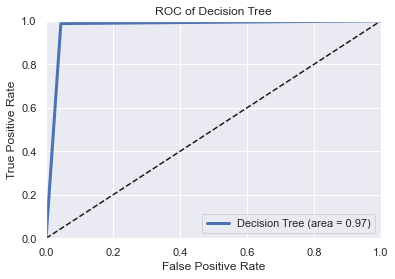

<Figure size 648x648 with 0 Axes>

In [53]:
#Plot ROC curve
FPr, TPr, threshold = roc_curve(y_test, Tree_model.predict_proba(x_test)[:,1])

plt.plot(FPr,TPr, linewidth=3, label = 'Decision Tree (area = %0.2f)' %Tree_AUC)
plt.plot([0,1],[0,1],'k--') #draw the diagonal baseline
plt.title('ROC of Decision Tree')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(9,9))
plt.show()

In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=108)
result_kfold_dt = model_selection.cross_val_score(Tree_model, x, y, cv=kfold, scoring = "accuracy")
print(result_kfold_dt.mean(), '+/-', result_kfold_dt.std())

0.9716465177954265 +/- 0.0340076310473948


3. Support Vector Machine (SVM)

In [55]:
# Create instance of SVM
svm = SVC(probability = True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [56]:
#Checking model's performance
svm.predict_proba(x) 

array([[0.06967848, 0.93032152],
       [0.03372755, 0.96627245],
       [0.07996479, 0.92003521],
       ...,
       [0.94536487, 0.05463513],
       [0.97501966, 0.02498034],
       [0.93923504, 0.06076496]])

In [57]:
#predicted target for holdout data
svm_predict = svm.predict(x_test)
svm_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
#check accuracy of our model on the training data and test data
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.9329758713136729
0.9274546591619762


In [59]:
#Confusion matrix
svm_matrix = confusion_matrix(y_test, svm_predict)
svm_matrix

array([[ 317,   91],
       [  25, 1166]], dtype=int64)

In [60]:
#Classification report
svm_report = classification_report(y_test, svm.predict(x_test))
print(svm_report)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       408
           1       0.93      0.98      0.95      1191

    accuracy                           0.93      1599
   macro avg       0.93      0.88      0.90      1599
weighted avg       0.93      0.93      0.93      1599



In [61]:
#AUC of ROC curve 
svm_AUC = roc_auc_score(y_test, svm.predict(x_test))
print(svm_AUC)

0.8779850101249567


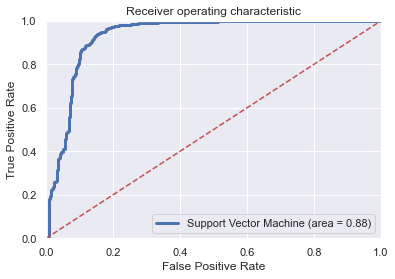

<Figure size 576x576 with 0 Axes>

In [62]:
FPr, TPr, threshold = roc_curve(y_test, svm.predict_proba(x_test)[:,1])

plt.plot(FPr, TPr, linewidth = 3, label = 'Support Vector Machine (area = %0.2f)' % svm_AUC)
plt.plot([0, 1], [0, 1],'r--')  # Draw the diagonal baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.figure(figsize = (8,8))
plt.show()

In [63]:
kfold = model_selection.KFold(n_splits=10, random_state=108)
result_kfold_svm = cross_val_score(svm, x, y, cv=kfold, scoring = "accuracy")
print(result_kfold_svm.mean(), '+/-', result_kfold_svm.std())

0.9213474587030429 +/- 0.08878729337804682


4. K Nearest Neighbors (KNN)

In [64]:
#Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
#Checking model's performance
knn.predict_proba(x) 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [66]:
KNN_predict = knn.predict(x_test)
KNN_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.9324577861163227

In [68]:
#Confusion matrix
KNN_matrix = confusion_matrix(y_test, KNN_predict)
KNN_matrix

array([[ 341,   67],
       [  41, 1150]], dtype=int64)

In [69]:
#Classification report
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       408
           1       0.94      0.97      0.96      1191

    accuracy                           0.93      1599
   macro avg       0.92      0.90      0.91      1599
weighted avg       0.93      0.93      0.93      1599



In [70]:
knn_AUC = roc_auc_score(y_test, knn.predict(x_test))
print(knn_AUC)

0.9006797303304193


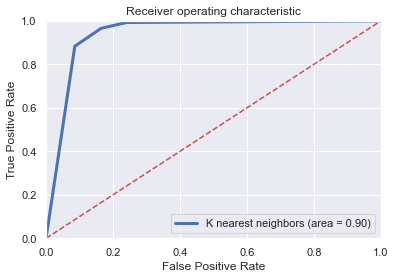

<Figure size 576x576 with 0 Axes>

In [71]:
#Plot ROC curve 
knn_FPr, knn_TPr, threshold = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

plt.plot(knn_FPr, knn_TPr, linewidth = 3, label = 'K nearest neighbors (area = %0.2f)' % knn_AUC)
plt.plot([0, 1], [0, 1],'r--')  # Draw the diagonal baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.figure(figsize = (8,8))
plt.show()

In [72]:
kfold = model_selection.KFold(n_splits=10, random_state=108)
result_kfold_knn = cross_val_score(knn, x, y, cv=kfold, scoring = "accuracy")
print(result_kfold_knn.mean(), '+/-', result_kfold_knn.std())

0.9243606201244198 +/- 0.05587065128258626


5. Linear Discriminant

In [73]:

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

model_lda= LinearDiscriminantAnalysis()

grid_search = GridSearchCV(
    model_lda, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [74]:
lda_predict = grid_search.predict(x_test)
lda_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
#check accuracy of our model on the test data
grid_search.score(x_test, y_test)

0.9956222639149468

In [76]:
#Confusion matrix
confusion_matrix(y_test, lda_predict)

array([[ 403,    5],
       [   2, 1189]], dtype=int64)

In [77]:
#Classification report
print(classification_report(y_test, lda_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1599
   macro avg       1.00      0.99      0.99      1599
weighted avg       1.00      1.00      1.00      1599



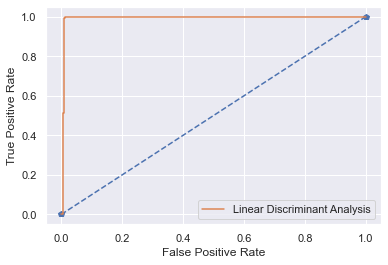

<Figure size 720x720 with 0 Axes>

In [78]:
#Plot ROC curve
y_pred1 = grid_search.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)
plt.plot([0,1],[0,1],'p--')
plt.plot(fpr,tpr,label='Linear Discriminant Analysis')
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(loc = 'lower right')
plt.figure(figsize=(10,10))
plt.show()

In [79]:
kfold = model_selection.KFold(n_splits=10, random_state=108)
result_kfold_dt = model_selection.cross_val_score(grid_search, x, y, cv=kfold, scoring = "accuracy")
print(result_kfold_dt.mean(), '+/-', result_kfold_dt.std())

0.9930528713904836 +/- 0.007568628512003822


In [80]:
#Interpretation 2nd objective 

- Rank of the models based on their accuracy :
  + LDA : 99%
  + Decision Tree: 97%
  + Logistic Regression: 97%
  + KNN:93%
  + SVM: 93%
- Since the results of all 5 models are independent and pretty equal, we chose the one with the highest level of accuracy, which is Linear Discriminant Analysis in this case

**PREDICTION**

In [81]:
#Creating a new(fake) wine information
wine_info=[6.5,0.25,0.35,8.3,0.047,43,157,1,3.2,0.45,9,5]
def prediction(wine_info):
    if grid_search.predict([wine_info])[0]==1:
        print('The wine is White')
    else:
        print('The wine is Red')
prediction(wine_info)

The wine is White


Our prediction model point out that with the wine data: [6.5,0.25,0.35,8.3,0.047,43,157,1,3.2,0.45,9,5] is White wine.

In [82]:
#Test with another data of wine
wine_info=[5.9,0.625,0.12,2.0,0.073,32.0,44.0,0.99721,3.57,0.7,10.2,5]
prediction(wine_info)

The wine is Red


Our prediction model point out that with the wine data:[5.9,0.625,0.12,2.0,0.073,32.0,44.0,0.99721,3.57,0.7,10.2,5] is Red wine